### Lanturi Markov ireductibile si aperiodice

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Definim o functie care genereaza graful de tranzitie al unui lant Markov cu $m$ stari, codificate
$0,1, \ldots, m-1$, avand matricea de tranzitie $Q$:

In [2]:
def GraphTr(Q):
    G=nx.from_numpy_matrix(Q, create_using=nx.DiGraph())
    nx.draw(G, node_color='b', alpha=0.3)

Functia `EquilD` calculeaza distributia de echilibru a unui lant ireductibil si aperiodic
ca vector propriu corespunzator valorii proprii 1 a matricii de tranzitie, transpusa:

In [3]:
def EquilD(Q):
    Lam, V=np.linalg.eig(Q.T)
    absLam=np.abs(Lam)
    j=np.argmax(absLam)#indicele valorii proprii ce are valoarea absoluta maxima
    v=V[:,j]  # extragem vectorul propriu corespunzator lui 1; 
    # calculam distributia de echilibru impartind fiecare coordonata a lui v la
    #suma coordonatelor:
    return v/np.sum(v) 


### Exemplul 1

Distributia de echilibru  calculata ca vector proriu este:
[ 0.16  0.48  0.36]
Distributia aproximata de sirul pi_n este:
<built-in method round of numpy.ndarray object at 0x000000000A6EBEE0>
norma diferentei dintre cele doua:
5.14645275989e-11


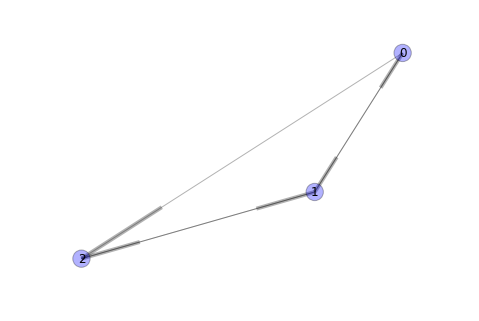

In [4]:
#Exemplu de definire a grafului de tranzitie a unui Lant Markov
#Constructia distributiei de echilibru ca vector propriu corespunzator valorii 1
# Generarea sirului pi_n, cu n suficient de mare
 
pia=np.array([0.3, 0.45, 0.25])    #distributia initiala de probabilitate                       
Q=[[0, 3./4, 1./4],
[1./3, 0, 2./3],
[0, 1.0, 0]]
Q=np.array(Q)# am introdus elementele lui Q
             #intr-o lista de liste si apoi am convertit la array
#Distributia de echilibru calculata ca un vector propriu al matricii Q transpus:

GraphTr(Q)
pie=EquilD(Q)

#Distributia de echilibru ca o aproximatie a limitei sirului pi_n
n=200
for i in range (n):
    pia=np.dot(pia,Q)


print 'Distributia de echilibru  calculata ca vector proriu este:\n', pie
print 'Distributia aproximata de sirul pi_n este:\n',pia.round
print 'norma diferentei dintre cele doua:\n', np.linalg.norm(pie-pia)

### Exemplul 2

Un lant Markov cu 4 stari are matricea de tranzitie $Q$.

[[ 0.4   0.    0.3   0.3 ]
 [ 0.    0.5   0.3   0.2 ]
 [ 0.    0.3   0.3   0.4 ]
 [ 0.2   0.2   0.45  0.15]]


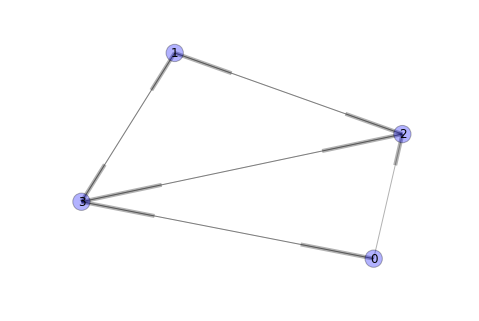

In [5]:
Q=[[0.4, 0, 0.3, 0.3], [0, 0.5, 0.3, 0.2],  [0, 0.3, 0.3, 0.4], [0.2, 0.2, 0.45, 0.15]]

Q=np.array(Q)
print Q
GraphTr(Q)


Precizam ca desi matricea de tranzitie are elemente nenule pe diagonala principala, `networkx` nu
afiseaza si buclele $(0,0)$, $(1,1)$, $(2,2)$, $(3,3)$ (nu este implementata afisarea grafica a buclelor)

In [6]:
pii=np.array([0.25, 0.25, 0.25, 0.25])#distributia initiala de probabilitate

Calculam si afisam distributiile de probabilitate $\pi_n$ cu $n=\overline{0,9}$. Apoi calculam fara a afisa $\pi_n$
cu $n=\overline{10,49}$. Incepand de la $\pi_{50}$ afisam din nou:

In [7]:
for i in range(10):
    print pii.round(4)
    pii=np.dot(pii, Q)
   

[ 0.25  0.25  0.25  0.25]
[ 0.15    0.25    0.3375  0.2625]
[ 0.1125  0.2788  0.3394  0.2694]
[ 0.0989  0.2951  0.3404  0.2657]
[ 0.0927  0.3028  0.3398  0.2647]
[ 0.09    0.3063  0.3397  0.264 ]
[ 0.0888  0.3079  0.3396  0.2637]
[ 0.0883  0.3086  0.3396  0.2636]
[ 0.088   0.3089  0.3395  0.2636]
[ 0.0879  0.309   0.3395  0.2635]


Observam ca pe masura ce $n$ creste, se schimba probabilitatile de vizita a nodurilor 0,1,2,3.
Initial, fiecare nod avea aceeasi probabilitate de a fi vizitat. Dupa  9 pasi probabilitatea  ca nodul 0 sa fie vizitat a scazut de la 0.25
cat era initial, la 0.0879, in timp ce pentru nodurile 1,2, 3 a crescut.

In [8]:
for i in range(10,50):
     pii=np.dot(pii, Q)

In [9]:
for i in range(50, 60):
    print pii.round(4)
    pii=np.dot(pii, Q)

[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]


Se observa ca distributia de probabilitate a vizitelor nodurilor s-a stabilizat si deci distributia
de echilibru experimentala  calculata cu 4 zecimale este $\pi=[0.0878, 0.3091, 0.3395, 0.2635]$

Suma coordonatelor este:

In [10]:
print np.sum(pii)

1.0


si deci $\pi$ este vector probabilist. $\pi(k)$, $k=0,1,2,3$,  este probabilitatea de vizita asimptotica a nodului   $k$.

Sa calculam acum distributia de echilibru ca vector propriu corespunzator valorii proprii 1, a matricii
$Q^T$:

In [11]:
pit= EquilD(Q)
print pit

[ 0.08783784  0.30912162  0.33952703  0.26351351]


In [12]:
print np.sum(pit)

1.0


Norma diferentei dintre cele doua distributii de echilibru,  `pii`, dedusa  in urma plimbarii aleatoare pe graf, conform matricii de tranzitie $Q$ si cea teoretica (ca vector propriu)
este:

In [13]:
print  np.linalg.norm(pii-pit)

2.54384052431e-16


adica foarte mica.

Luand o alta distributie initiala de probabilitate si afisand sirurile asociate ca in cazul precedent avem:

In [14]:
pii=np.array([0.2, 0.3, 0.4, 0.1])

In [15]:
for i in range(10):
    print pii.round(4)
    pii=np.dot(pii, Q)
   

[ 0.2  0.3  0.4  0.1]
[ 0.1    0.29   0.315  0.295]
[ 0.099   0.2985  0.3443  0.2583]
[ 0.0913  0.3042  0.3387  0.2658]
[ 0.0897  0.3069  0.3399  0.2636]
[ 0.0886  0.3081  0.3395  0.2638]
[ 0.0882  0.3087  0.3396  0.2636]
[ 0.088   0.3089  0.3395  0.2636]
[ 0.0879  0.309   0.3395  0.2635]
[ 0.0879  0.3091  0.3395  0.2635]


In [16]:
for i in range(10,50):
     pii=np.dot(pii, Q)

In [17]:
for i in range(50, 60):
    print pii.round(4)
    pii=np.dot(pii, Q)

[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]
[ 0.0878  0.3091  0.3395  0.2635]


Remarcam ca si in acest caz pentru $n\geq 50$, $\pi_n$ s-a stabilizat la
$\pi_n=[ 0.0878,   0.3091,   0.3395,  0.2635]^T$, adica la fel ca in cazul in care am avut distributia uniforma ca distributie 
initiala de probabilitate.


### Exemplul 3

Acest exemplu ilustreaza ca daca un lant Markov contine traiectorii periodice, atunci desi matricea $Q^T$ admite valoarea proprie 1, vectorul propriu corespunzator nu e sigur ca are toate coordonatele nenule si de acelasi semn. In plus in acest caz fixand o distributie  initiala de probabilitate, sirul corespunzator $\pi_n$, cu $\pi_n^T=\pi_{n-1}^TQ$, nu e convergent.


In [18]:
Q=[[0, 0, 1, 0, 0, 0, 0, 0], [0,0,0,1, 0,0,0,0], [0,1, 0,0, 0, 0, 0, 0],
   [1,0,0,0, 0, 0, 0, 0], [0.6, 0, 0, 0, 0, 0.4, 0, 0], [0.2, 0, 0, 0, 0, 0, 0.8, 0], 
   [0.25, 0, 0, 0, 0.2, 0.4, 0, 0.15], [0, 0, 0, 0.65, 0, 0, 0.35, 0]]
Q=np.array(Q)

In [19]:
print Q

[[ 0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.6   0.    0.    0.    0.    0.4   0.    0.  ]
 [ 0.2   0.    0.    0.    0.    0.    0.8   0.  ]
 [ 0.25  0.    0.    0.    0.2   0.4   0.    0.15]
 [ 0.    0.    0.    0.65  0.    0.    0.35  0.  ]]


Graful asociat este:

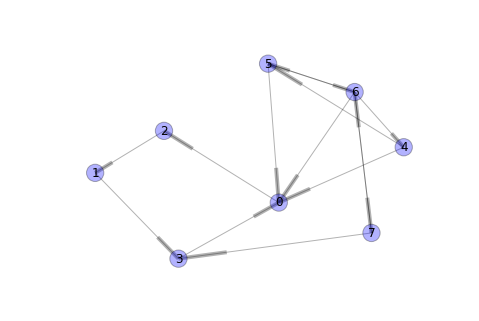

In [23]:
GraphTr(Q)

Remarcam din graf ca exista un drum periodic de perioada 4, si anume:
    $0\to2\to1\to3\to 0$.
    

Fie $\pi=[0,0,0,0,0.25, 0.25, 0.25,0.25]$ distributia initiala de probabilitate. Probabilitatea ca miscarea aleatoare pe graf sa inceapa din nodurile 0,1,2,3
este 0 si respectiv in mod uniform poate incepe din nodurile 4,5,6,7. 

Graful (matricea de tranzitie)  nu este ireductibil(a) deoarece nu exista drum de arce intre nodul $3$ de exemplu si nodul $5$.

Valorile si vectorii proprii ale matricii  $Q^T$ sunt:

In [24]:
Lam, V=np.linalg.eig(Q.T)
print Lam.round(2)

[-1.00+0.j  0.00+1.j  0.00-1.j  1.00+0.j  0.68+0.j -0.49+0.j -0.19+0.j
  0.00+0.j]


Mai precis valorile proprii sunt $-1, i, -i, 1, 0.68, -0.49, -0.19, 0$
iar valorile lor absolute:

In [25]:
absLam=np.abs(Lam)
print absLam.round(3)

[ 1.     1.     1.     1.     0.683  0.492  0.19   0.   ]


Remarcam ca nu exista un unic maxim al valorilor absolute, ci patru. 

Matricea $Q$  fiind stochastica pe linii are sigur valoarea proprie 1 si vectorul ei propriu
este:

In [26]:
v=V[:,3]
print v.round(3)

[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j  0.0+0.j  0.0+0.j  0.0+0.j  0.0+0.j]


Contrar cazului cand matricea este ireductibila si aperiodica, in acest caz vectorul propriu corespunzator
valorii 1, nu are toate coordonatele nenule.


Sa investigam acum distributiile de probabilitate la momentele $n=1,2,\ldots$, cand distributia initiala este distributia uniforma:

In [27]:
pii=0.125*np.ones(8)
print pii 

[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]


In [28]:
for i in range(35):
    print pii.round(3)
    pii=np.dot(pii, Q)

[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
[ 0.256  0.125  0.125  0.206  0.025  0.1    0.144  0.019]
[ 0.277  0.125  0.256  0.137  0.029  0.068  0.087  0.022]
[ 0.19   0.256  0.277  0.139  0.017  0.046  0.062  0.013]
[ 0.174  0.277  0.19   0.265  0.012  0.032  0.041  0.009]
[ 0.289  0.19   0.174  0.283  0.008  0.022  0.028  0.006]
[ 0.3    0.174  0.289  0.194  0.006  0.015  0.019  0.004]
[ 0.205  0.289  0.3    0.177  0.004  0.01   0.013  0.003]
[ 0.184  0.3    0.205  0.291  0.003  0.007  0.009  0.002]
[ 0.296  0.205  0.184  0.301  0.002  0.005  0.006  0.001]
[ 0.304  0.184  0.296  0.206  0.001  0.003  0.004  0.001]
[ 0.208  0.296  0.304  0.185  0.001  0.002  0.003  0.001]
[ 0.187  0.304  0.208  0.296  0.001  0.001  0.002  0.   ]
[ 0.297  0.208  0.187  0.305  0.     0.001  0.001  0.   ]
[ 0.305  0.187  0.297  0.208  0.     0.001  0.001  0.   ]
[ 0.209  0.297  0.305  0.187  0.     0.     0.001  0.   ]
[ 0.187  0.305  0.209  0.297  0.     0.     0.     0.   ]
[ 0.298  0.209

Remarcam ca in loc ca sirul $\pi_n$ sa tinda la o limita el are 4 subsiruri ce tind la limite diferite (ultimele 4 distributii se repeta dupa un rang $n$)

Luam acum o alta distributie initiala de probabilitate: $\pi=[0,0,0,0,1,0,0,0]^T$ si calculam sirul distributiilor $\pi_n$ asociat:

In [29]:
pii=np.array([0,0,0,0,1,0,0,0])
for i in range(35):
    print pii.round(3)
    pii=np.dot(pii,Q)

[0 0 0 0 1 0 0 0]
[ 0.6  0.   0.   0.   0.   0.4  0.   0. ]
[ 0.08  0.    0.6   0.    0.    0.    0.32  0.  ]
[ 0.08   0.6    0.08   0.     0.064  0.128  0.     0.048]
[ 0.064  0.08   0.08   0.631  0.     0.026  0.119  0.   ]
[ 0.666  0.08   0.064  0.08   0.024  0.048  0.02   0.018]
[ 0.109  0.064  0.666  0.092  0.004  0.018  0.044  0.003]
[ 0.109  0.666  0.109  0.066  0.009  0.019  0.015  0.007]
[ 0.079  0.109  0.109  0.67   0.003  0.01   0.018  0.002]
[ 0.679  0.109  0.079  0.11   0.004  0.008  0.009  0.003]
[ 0.116  0.079  0.679  0.11   0.002  0.005  0.008  0.001]
[ 0.114  0.679  0.116  0.08   0.002  0.004  0.004  0.001]
[ 0.083  0.116  0.114  0.679  0.001  0.002  0.003  0.001]
[ 0.681  0.114  0.083  0.117  0.001  0.002  0.002  0.001]
[ 0.118  0.083  0.681  0.115  0.     0.001  0.002  0.   ]
[ 0.116  0.681  0.118  0.083  0.     0.001  0.001  0.   ]
[ 0.083  0.118  0.116  0.681  0.     0.001  0.001  0.   ]
[ 0.682  0.116  0.083  0.118  0.     0.     0.     0.   ]
[ 0.118  0.083  0.68

Remarcam din nou ca ultimele 4 distributii se repeta incepand de la un anumit rang. Prin urmare exista 4 subsiruri convergente ale 
sirului $(\pi_n)$ si limitele depind de distributia initiala.

Acest exemplu ilustreaza ce importante sunt ipotezele de matrice ireductibila si aperiodica in asigurarea unicitatii distributiei de echilibru
si a coordonatelor nenule si de acelasi semn pentru vectorul propriu al lui $Q^T$, corespunzator valorii
1.

### Lanturi Markov absorbante

Analizam doua lanturi Markov absorbante ce modeleaza doua metode de forwardare a pachetelor de informatie in relele wireless (vezi descrierea in lista de probleme relativ la lanturi Markov).


#### Cooperative ARQ

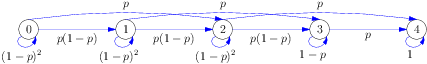

In [30]:
from IPython.display import Image
Image(filename='Imags/MarkovAbsC.png')

Matricea de tranzitie pentru o astfel de retea cu $n$ noduri  si probabilitatea forwardarii  cu succes dintr-un nod i spre nodul i+2, $i=\overline{0, n-3}$,    egala cu p, este generata de functia: 

In [31]:
def MatrixC(n, p):    
  Q=[]  
  for i in range(n):
     Q.append([])
  for i in range(n):
     [Q[i].append(0) for j in range(n)]
    
  for i in range(n-2):
     Q[i][i:i+3]=[(1-p)**2, p*(1-p), p]
  Q[n-2] [n-2:n]=[(1-p),p]  
  Q[n-1][n-1]=1
  return np.array(Q)


Pentru cazul  $n=5$ vizualizat in imaginea de mai sus si $p=0.85$, matricea de tranzitie  este:

In [32]:
Q=MatrixC(5, 0.85)
print Q

[[ 0.0225  0.1275  0.85    0.      0.    ]
 [ 0.      0.0225  0.1275  0.85    0.    ]
 [ 0.      0.      0.0225  0.1275  0.85  ]
 [ 0.      0.      0.      0.15    0.85  ]
 [ 0.      0.      0.      0.      1.    ]]


Se observa si din graf si din matricea de tranzitie ca nodul $n=4$, destinatia pachetului, este absorbant.
Aceasta este o forma standard a matricii de tranzitie oarecum opusa celei discutate la curs. In acest exemplu primele noduri sunt
tranzitorii si ultimul este absorbant. In aceasta scriere matricea tranzitorie $T$ este formata din elementele de intersectie ale liniilor si coloanelor
$0,1,2,3$:

In [33]:
T=Q[:4,:4]
print T

[[ 0.0225  0.1275  0.85    0.    ]
 [ 0.      0.0225  0.1275  0.85  ]
 [ 0.      0.      0.0225  0.1275]
 [ 0.      0.      0.      0.15  ]]


Matricea fundamentala $N$ este:

In [34]:
I=np.eye(4)
N=np.linalg.inv(I-T)
print N.round(4)

[[ 1.023   0.1334  0.907   0.2695]
 [ 0.      1.023   0.1334  1.043 ]
 [ 0.      0.      1.023   0.1535]
 [ 0.      0.      0.      1.1765]]


Suma elementelor de pe linia 0 a matricii N este timpul mediu petrecut de un pachet in retea, inainte de ajunge la destinatie (nodul 4).


In [35]:
timp=np.sum(N[0])
print timp

2.33292560881


#### Non-Cooperative ARQ

Protoculul de forwardare este in acest caz ilustrat pe o retea de 5 noduri, indexate $0,1,2,3,4$:



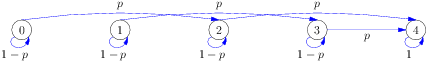

In [36]:
Image(filename='Imags/MarkovAbsNon.png')

Matricea de tranzitie este in acest caz:

In [37]:
def MatrixNonC(n,p):
    Q=[]  
    for i in range(n):
       Q.append([])
    for i in range(n):
       [Q[i].append(0) for j in range(n)]
    
    for i in range(n-2):
       Q[i][i:i+3]=[(1-p), 0, p]
    Q[n-2][n-2:n]=[(1-p),p]  
    Q[n-1][n-1]=1.0
    return np.array(Q)


In [38]:
print MatrixNonC(5,0.85)

[[ 0.15  0.    0.85  0.    0.  ]
 [ 0.    0.15  0.    0.85  0.  ]
 [ 0.    0.    0.15  0.    0.85]
 [ 0.    0.    0.    0.15  0.85]
 [ 0.    0.    0.    0.    1.  ]]


In continuare comparam performanta teoretica si experimentala a celor doua metode de forwardare a pachetelor intr-o retea de $n=100$
 noduri si probabilitatea, $p$, de forwardare de la nodul $i$ la nodul $i+2$, 
$i=\overline{0,n-3}$, mai apropiat de 
destinatie, egala cu $p=0.85$.

O masura a performantei teoretice este  timpul mediu   petrecut in retea inainte de ajunge la destinatie. Deci dintre cele doua protocoale va fi mai performant cel pentru care  suma elementelor de pe linia $0$ a matricii fundamentale,  $N$, mai mica.

Performanta  experimentala se evalueaza simuland mai multe forwardari (`nr`) si dupa fiecare calculand numarul de noduri disticte sau nu, vizitate de pachet inainte de ajunge la destinatie. 
Dupa cele `nr` forwardari simulate, se calculeaza media aritmetica a numarului de noduri vizitate.

Fiecare nod este vizitat intr-o unitate de timp si deci aceasta medie este timpul mediu petrecut in retea.

Pentru a calcula matricea fundamentala  a lantului, $N=(I-T)^{-1}$,  apelam functia
`inv` din `scipy.linalg`, deoarece este mai performanta decat functia `np.linalg.inv`.

Pentru a simula forwardarea, adica lantul Markov, definim functia: 

In [39]:
def  simul(pr):
    k=0
    F=pr[0]
    u=np.random.random()
    while(u>F):
        k+=1
        F=F+pr[k]
    return k

In [40]:
import scipy.linalg as spl
n=100
p=0.85

Q=MatrixC(n,p)#matricea de tranzitie conform primului protocol de forwardare
T=Q[:n-1,:n-1]
I=np.eye(n-1)
NC=spl.inv(I-T)
perfC=np.sum(NC[0])


S=MatrixNonC(n,p)
T=S[:n-1,:n-1]
NN=spl.inv(I-T)
perfNC=np.sum(NN[0])

print 'timpul mediu petrecut in retea de un pachet forwardat cf protocolului CARQ', perfC
print 'timpul mediu petrecut in retea de un pachet forwardat cf protocolului NCARQ', perfNC



timpul mediu petrecut in retea de un pachet forwardat cf protocolului CARQ 54.5089558859
timpul mediu petrecut in retea de un pachet forwardat cf protocolului NCARQ 58.8235294118


Deci protocolul CARQ este mai performant, din punct de vedere teoretic.
Sa verificam si experimental. mai intai generam o traiectorie a unui pachet conform fiecarui protocol si o afisam:

In [41]:
def forward(Q):
  n=Q.shape[0]  
  nod=0
  pr=Q[0]# pachetul porneste din nodul 0
  traj=[nod]
  while(nod!=n-1):
     nod=simul(pr)
     traj.append(nod)
     pr=Q[nod]
  return traj      


In [42]:
traj1=forward(Q)
traj2=forward(S)

In [43]:
print 'traiectoria pachetului conform protocolului CARQ\n', traj1    
print 'nr de noduri vizitate in fiecare unitate de timp:', len(traj1)-1

traiectoria pachetului conform protocolului CARQ
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 46, 48, 50, 52, 54, 56, 57, 59, 61, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 84, 85, 87, 89, 91, 93, 95, 97, 99]
nr de noduri vizitate in fiecare unitate de timp: 53


In [44]:
print 'traiectoria pachetului conform protocolului NCARQ\n', traj2    
print 'nr de noduri vizitate in fiecare unitate de timp:', len(traj2)-1

traiectoria pachetului conform protocolului NCARQ
[0, 2, 4, 6, 8, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 90, 92, 94, 94, 96, 98, 99]
nr de noduri vizitate in fiecare unitate de timp: 55


Forwardam  50 pachete si calculam media numarului de noduri vizitate conform fiecarui protocol:

In [45]:
nr=50
lentr1=0
lentr2=0
for k in range(nr):
    traj1=forward(Q)
    traj2=forward(S)
    lentr1+=len(traj1)-1
    lentr2+=len(traj2)-1
print 'Media timpului petrecut in retea de un pachet forwardat cf CARQ este: ', float(lentr1)/nr 
print 'Media timpului petrecut in retea de un pachet forwardat cf NCARQ este: ', float(lentr2)/nr 

Media timpului petrecut in retea de un pachet forwardat cf CARQ este:  54.76
Media timpului petrecut in retea de un pachet forwardat cf NCARQ este:  58.52


Media teoretica era respectiv 54.50, respectiv 58.82.

Prin urmare atat teoretic cat si experimental
protocolul CARQ este mai performant.

In [46]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()